In [61]:
# P4
import mdptoolbox.example
import numpy as np
import time
import matplotlib.pyplot as plt
#import mdptoolbox
#import hiive.mdptoolbox

In [40]:
def get_policy_reward(P, R, policy, disc):
    num_state = P.shape[-1]
    num_epoch = 10
    total_reward = 0
    for state in range(num_state):
        state_reward = 0
        for epoch in range(num_epoch):
            epoch_reward = 0
            discount_rate = 1
            while True:
                action = policy[state]
                probs = P[action][state]
                all_next_states = list(range(len(probs)))
                next_state = np.random.choice(all_next_states, 1, p=probs)[0]
                reward = R[state][action]
                epoch_reward = epoch_reward + reward
                discount_rate = discount_rate*disc
                
                if (next_state==0):
                    break
            state_reward = state_reward+epoch_reward
        total_reward = total_reward + state_reward
    policy_reward = total_reward / (num_epoch*num_state)
#    print (policy_reward)
    return policy_reward

In [45]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning, PolicyIterationModified
from hiive.mdptoolbox.example import forest


P, R = forest(S=4, r1=4, r2=2)

disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000]

vi_f_val = [0]*len(discount_rates)
vi_iters = [0]*len(discount_rates)
vi_runtime = [0]*len(discount_rates)
vi_policy = [0]*len(discount_rates)
vi_reward = [0]*len(discount_rates)

pi_f_val = [0]*len(discount_rates)
pi_iters = [0]*len(discount_rates)
pi_runtime = [0]*len(discount_rates)
pi_policy = [0]*len(discount_rates)
pi_reward = [0]*len(discount_rates)

ql_f_val = [0]*len(discount_rates)
ql_iters = [0]*len(discount_rates)
ql_runtime = [0]*len(discount_rates)
ql_policy = [0]*len(discount_rates)
Q_tables = []
policy_reward=[]
training_reward = []


for i in range(len(discount_rates)):
    disc = discount_rates[i]
    print (disc)
    vi = ValueIteration(P, R, disc, max_iter = 100)
    vi.run()
    vi_f_val[i] = np.mean(vi.V)
    vi_iters[i] = vi.iter
    vi_runtime[i] = vi.time
    vi_policy[i] = vi.policy
    vi_reward[i] = get_policy_reward(P, R, vi.policy, disc)
    

    pi = PolicyIteration(P, R, disc)
    pi.run()
    pi_f_val[i] = np.mean(pi.V)
    pi_iters[i] = pi.iter
    pi_runtime[i] = pi.time
    pi_policy[i] = pi.policy    
    pi_reward[i] = get_policy_reward(P, R, pi.policy, disc)
    
    
    ql = QLearning(P, R, disc, epsilon = 0.9)
    ql.run()
    ql_f_val[i] = np.mean(ql.V)
    #ql_iters[i] = ql.iter
    ql_runtime[i] = ql.time
    ql_policy[i] = ql.policy 
    Q_tables.append(ql.Q)
    pol_rews = get_policy_reward(P, R, ql.policy, disc)
    policy_reward.append(pol_rews)
    st = (ql.run_stats)
    rews = [s['Reward'] for s in st]
    training_reward.append(rews)
    
    print (ql.policy)

0.1
(0, 1, 1, 1)
0.2
(0, 1, 0, 0)
0.3
(0, 1, 0, 0)
0.4
(0, 1, 1, 0)
0.5
(0, 1, 1, 0)
0.6
(0, 0, 0, 0)
0.7
(0, 0, 0, 0)
0.8
(0, 0, 0, 0)
0.9
(0, 0, 0, 0)
0.9999
(0, 0, 0, 0)


In [56]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning, PolicyIterationModified
vi = ValueIteration(P, R, 0.99, epsilon = 0.9,max_iter = 100)
vi = PolicyIterationModified(P, R, 0.99,epsilon = 0.9, max_iter = 100)
ql = QLearning(P, R, 0.99, epsilon = 0.9, n_iter = 50000)

In [105]:
P, R = forest(S=16, r1=4, r2=2)

disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

# 0: time, 1: reward, 2: iters, 3:meanV

vi_disc_var = np.zeros((len(disc_rate), 4))
vi_eps_var = np.zeros((len(eps), 4))
vi_iter_var = np.zeros((len(max_iter), 4))

pi_disc_var = np.zeros((len(disc_rate), 4))
pi_eps_var = np.zeros((len(eps), 4))
pi_iter_var = np.zeros((len(max_iter), 4))

ql_disc_var = np.zeros((len(disc_rate), 4))
ql_eps_var = np.zeros((len(eps), 4))
ql_iter_var = np.zeros((len(max_iter), 4))

print ('1')
for i in range(len(disc_rate)):
    vi = ValueIteration(P, R, disc_rate[i], epsilon = 0.9, max_iter = 10000)
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, disc_rate[i])    
    vi_disc_var[i,0] = vi.time
    vi_disc_var[i,1] = vi_reward
    vi_disc_var[i,2] = vi.iter
    vi_disc_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, disc_rate[i], epsilon = 0.9, max_iter = 10000)
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, disc_rate[i])    
    pi_disc_var[i,0] = pi.time
    pi_disc_var[i,1] = pi_reward
    pi_disc_var[i,2] = pi.iter
    pi_disc_var[i,3] = np.mean(pi.V)  
    
    ql = QLearning(P, R, disc_rate[i], epsilon = 0.9)
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, disc_rate[i])    
    ql_disc_var[i,0] = ql.time
    ql_disc_var[i,1] = ql_reward
#    ql_disc_var[i,2] = ql.iter
    ql_disc_var[i,3] = np.mean(ql.V)    
    print (np.mean(ql.V)  )
    
print ('2')    
for i in range(len(eps)):
    vi = ValueIteration(P, R, 0.99, epsilon = eps[i], max_iter = 10000)
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, 0.99)    
    vi_eps_var[i,0] = vi.time
    vi_eps_var[i,1] = vi_reward
    vi_eps_var[i,2] = vi.iter
    vi_eps_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, 0.99, epsilon = eps[i], max_iter = 10000)
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, 0.99)    
    pi_eps_var[i,0] = pi.time
    pi_eps_var[i,1] = pi_reward
    pi_eps_var[i,2] = pi.iter
    pi_eps_var[i,3] = np.mean(pi.V)  
    
    ql = QLearning(P, R, 0.99, epsilon =eps[i])
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, 0.99)    
    ql_eps_var[i,0] = ql.time
    ql_eps_var[i,1] = ql_reward
#    ql_eps_var[i,2] = ql.iter
    ql_eps_var[i,3] = np.mean(ql.V)    
    print (np.mean(ql.V)  )
    
print ('3')
for i in range(len(max_iter)):
    vi = ValueIteration(P, R, 0.99, epsilon = 0.9, max_iter = max_iter[i])
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, 0.99)    
    vi_iter_var[i,0] = vi.time
    vi_iter_var[i,1] = vi_reward
    vi_iter_var[i,2] = vi.iter
    vi_iter_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, 0.99, epsilon = 0.9, max_iter = max_iter[i])
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, 0.99)    
    pi_iter_var[i,0] = pi.time
    pi_iter_var[i,1] = pi_reward
    pi_iter_var[i,2] = pi.iter
    pi_iter_var[i,3] = np.mean(pi.V)  
    
    if (max_iter[i] < 10000):        
        ql = QLearning(P, R, 0.99, epsilon = 0.9)
    else:
        ql = QLearning(P, R, 0.99, epsilon =0.9, n_iter = max_iter[i])
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, 0.99)    
    ql_iter_var[i,0] = ql.time
    ql_iter_var[i,1] = ql_reward
#    ql_iter_var[i,2] = ql.iter
    ql_iter_var[i,3] = np.mean(ql.V)  
    print (np.mean(ql.V)  )
    
    

1
0.21955858590550564
0.26142138398740755
0.4098762068732107
0.5322374979846585
0.5260547383813775
2
0.6089588057181408
0.4006340118318632
0.48961002365587925
0.49378826629169925
0.6621554964039484
0.5000598597691968
0.3030996922200922
0.6533084734610856
0.3396812276889926
3
0.5326961806137769
0.5924897580873576
0.5641213814064201
0.5401911883542
0.5299588076129748
0.5889797706022363
1.926055580843197


In [95]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning, PolicyIterationModified
vi = ValueIteration(P, R, 0.99, epsilon = 0.9,max_iter = 10000)
vi = PolicyIterationModified(P, R, 0.99,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.99, epsilon = 0.9, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 16 Best Policy')
print (vi.policy)
print ('\nPI Forrest 16 Best Policy')
print (pi.policy)
print ('\nQL Forrest 16 Best Policy')
print (ql.policy)


VI Forrest 16 Best Policy
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

PI Forrest 16 Best Policy
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

QL Forrest 16 Best Policy
(0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0)


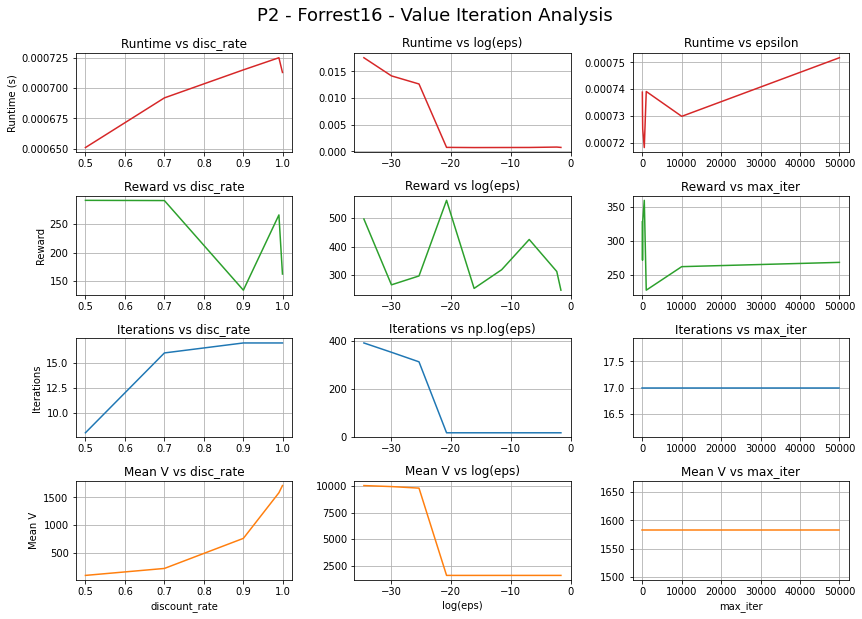

In [75]:
#plotting curves VI
disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

fig, axs = plt.subplots(4,3, figsize=(12,9))

axs[0, 0].plot(disc_rate, vi_disc_var[:,0], 'tab:red')
axs[0, 0].set_title('Runtime vs disc_rate')
axs[0, 0].set(ylabel='Runtime (s)')
axs[0, 0].grid()
axs[0, 1].plot(np.log(eps), vi_eps_var[:,0], 'tab:red')
axs[0, 1].set_title('Runtime vs log(eps)')
axs[0, 1].grid()
axs[0, 2].plot(max_iter, vi_iter_var[:,0], 'tab:red')
axs[0, 2].set_title('Runtime vs max_iter')
axs[0, 2].grid()

axs[1, 0].plot(disc_rate, vi_disc_var[:,1], 'tab:green')
axs[1, 0].set_title('Reward vs disc_rate')
axs[1, 0].set(ylabel='Reward')
axs[1, 0].grid()
axs[1, 1].plot(np.log(eps), vi_eps_var[:,1], 'tab:green')
axs[1, 1].set_title('Reward vs log(eps)')
axs[1, 1].grid()
axs[1, 2].plot(max_iter, vi_iter_var[:,1], 'tab:green')
axs[1, 2].set_title('Reward vs max_iter')
axs[1, 2].grid()

axs[2, 0].plot(disc_rate, vi_disc_var[:,2], 'tab:blue')
axs[2, 0].set_title('Iterations vs disc_rate')
axs[2, 0].set(ylabel='Iterations')
axs[2, 0].grid()
axs[2, 1].plot(np.log(eps), vi_eps_var[:,2], 'tab:blue')
axs[2, 1].set_title('Iterations vs np.log(eps)')
axs[2, 1].grid()
axs[2, 2].plot(max_iter, vi_iter_var[:,2], 'tab:blue')
axs[2, 2].set_title('Iterations vs max_iter')
axs[2, 2].grid()

axs[3, 0].plot(disc_rate, vi_disc_var[:,3], 'tab:orange')
axs[3, 0].set_title('Mean V vs disc_rate')
axs[3, 0].set(xlabel='discount_rate')
axs[3, 0].set(ylabel='Mean V')
axs[3, 0].grid()
axs[3, 1].plot(np.log(eps), vi_eps_var[:,3], 'tab:orange')
axs[3, 1].set_title('Mean V vs log(eps)')
axs[3, 1].set(xlabel='log(eps)')
axs[3, 1].grid()
axs[3, 2].plot(max_iter, vi_iter_var[:,3], 'tab:orange')
axs[3, 2].set_title('Mean V vs max_iter')
axs[3, 2].set(xlabel='max_iter')
axs[3, 2].grid()

fig.suptitle('P2 - Forrest16 - Value Iteration Analysis', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [39]:
P, R = forest(S=4)
print (P)
print (R)

[[[0.1 0.9 0.  0. ]
  [0.1 0.  0.9 0. ]
  [0.1 0.  0.  0.9]
  [0.1 0.  0.  0.9]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [4. 2.]]


In [71]:
print (vi.policy )
print (pi.policy )
print (ql.policy )

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)


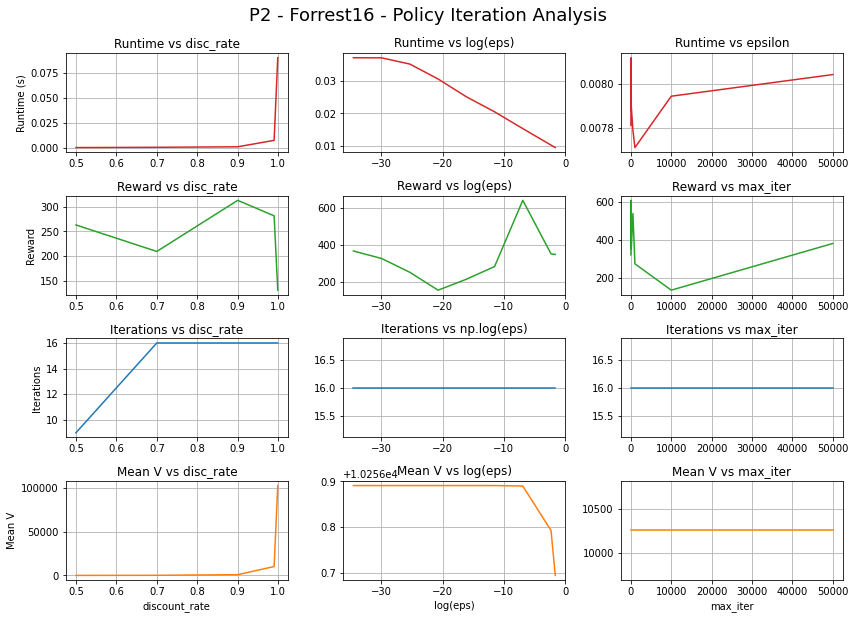

In [81]:
#plotting curves
disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

fig, axs = plt.subplots(4,3, figsize=(12,9))

axs[0, 0].plot(disc_rate, pi_disc_var[:,0], 'tab:red')
axs[0, 0].set_title('Runtime vs disc_rate')
axs[0, 0].set(ylabel='Runtime (s)')
axs[0, 0].grid()
axs[0, 1].plot(np.log(eps), pi_eps_var[:,0], 'tab:red')
axs[0, 1].set_title('Runtime vs log(eps)')
axs[0, 1].grid()
axs[0, 2].plot(max_iter, pi_iter_var[:,0], 'tab:red')
axs[0, 2].set_title('Runtime vs max_iter')
axs[0, 2].grid()

axs[1, 0].plot(disc_rate, pi_disc_var[:,1], 'tab:green')
axs[1, 0].set_title('Reward vs disc_rate')
axs[1, 0].set(ylabel='Reward')
axs[1, 0].grid()
axs[1, 1].plot(np.log(eps), pi_eps_var[:,1], 'tab:green')
axs[1, 1].set_title('Reward vs log(eps)')
axs[1, 1].grid()
axs[1, 2].plot(max_iter, pi_iter_var[:,1], 'tab:green')
axs[1, 2].set_title('Reward vs max_iter')
axs[1, 2].grid()

axs[2, 0].plot(disc_rate, pi_disc_var[:,2], 'tab:blue')
axs[2, 0].set_title('Iterations vs disc_rate')
axs[2, 0].set(ylabel='Iterations')
axs[2, 0].grid()
axs[2, 1].plot(np.log(eps), pi_eps_var[:,2], 'tab:blue')
axs[2, 1].set_title('Iterations vs np.log(eps)')
axs[2, 1].grid()
axs[2, 2].plot(max_iter, pi_iter_var[:,2], 'tab:blue')
axs[2, 2].set_title('Iterations vs max_iter')
axs[2, 2].grid()

axs[3, 0].plot(disc_rate, pi_disc_var[:,3], 'tab:orange')
axs[3, 0].set_title('Mean V vs disc_rate')
axs[3, 0].set(xlabel='discount_rate')
axs[3, 0].set(ylabel='Mean V')
axs[3, 0].grid()
axs[3, 1].plot(np.log(eps), pi_eps_var[:,3], 'tab:orange')
axs[3, 1].set_title('Mean V vs log(eps)')
axs[3, 1].set(xlabel='log(eps)')
axs[3, 1].grid()
axs[3, 2].plot(max_iter, pi_iter_var[:,3], 'tab:orange')
axs[3, 2].set_title('Mean V vs max_iter')
axs[3, 2].set(xlabel='max_iter')
axs[3, 2].grid()

fig.suptitle('P2 - Forrest16 - Policy Iteration Analysis', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

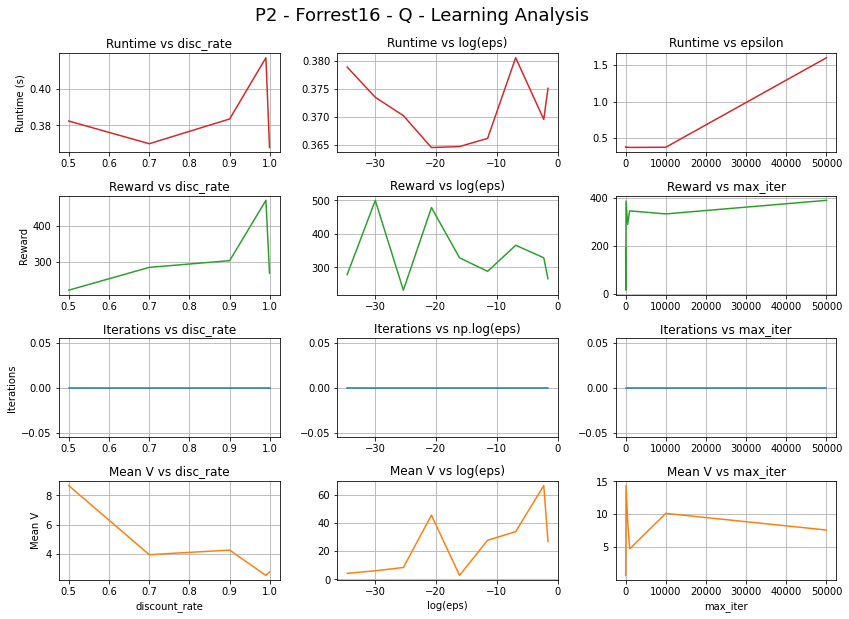

In [82]:
#plotting curvesQL
disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

fig, axs = plt.subplots(4,3, figsize=(12,9))

axs[0, 0].plot(disc_rate, ql_disc_var[:,0], 'tab:red')
axs[0, 0].set_title('Runtime vs disc_rate')
axs[0, 0].set(ylabel='Runtime (s)')
axs[0, 0].grid()
axs[0, 1].plot(np.log(eps), ql_eps_var[:,0], 'tab:red')
axs[0, 1].set_title('Runtime vs log(eps)')
axs[0, 1].grid()
axs[0, 2].plot(max_iter, ql_iter_var[:,0], 'tab:red')
axs[0, 2].set_title('Runtime vs max_iter')
axs[0, 2].grid()

axs[1, 0].plot(disc_rate, ql_disc_var[:,1], 'tab:green')
axs[1, 0].set_title('Reward vs disc_rate')
axs[1, 0].set(ylabel='Reward')
axs[1, 0].grid()
axs[1, 1].plot(np.log(eps), ql_eps_var[:,1], 'tab:green')
axs[1, 1].set_title('Reward vs log(eps)')
axs[1, 1].grid()
axs[1, 2].plot(max_iter, ql_iter_var[:,1], 'tab:green')
axs[1, 2].set_title('Reward vs max_iter')
axs[1, 2].grid()

axs[2, 0].plot(disc_rate, ql_disc_var[:,2], 'tab:blue')
axs[2, 0].set_title('Iterations vs disc_rate')
axs[2, 0].set(ylabel='Iterations')
axs[2, 0].grid()
axs[2, 1].plot(np.log(eps), ql_eps_var[:,2], 'tab:blue')
axs[2, 1].set_title('Iterations vs np.log(eps)')
axs[2, 1].grid()
axs[2, 2].plot(max_iter, ql_iter_var[:,2], 'tab:blue')
axs[2, 2].set_title('Iterations vs max_iter')
axs[2, 2].grid()

axs[3, 0].plot(disc_rate, ql_disc_var[:,3], 'tab:orange')
axs[3, 0].set_title('Mean V vs disc_rate')
axs[3, 0].set(xlabel='discount_rate')
axs[3, 0].set(ylabel='Mean V')
axs[3, 0].grid()
axs[3, 1].plot(np.log(eps), ql_eps_var[:,3], 'tab:orange')
axs[3, 1].set_title('Mean V vs log(eps)')
axs[3, 1].set(xlabel='log(eps)')
axs[3, 1].grid()
axs[3, 2].plot(max_iter, ql_iter_var[:,3], 'tab:orange')
axs[3, 2].set_title('Mean V vs max_iter')
axs[3, 2].set(xlabel='max_iter')
axs[3, 2].grid()

fig.suptitle('P2 - Forrest16 - Q - Learning Analysis', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

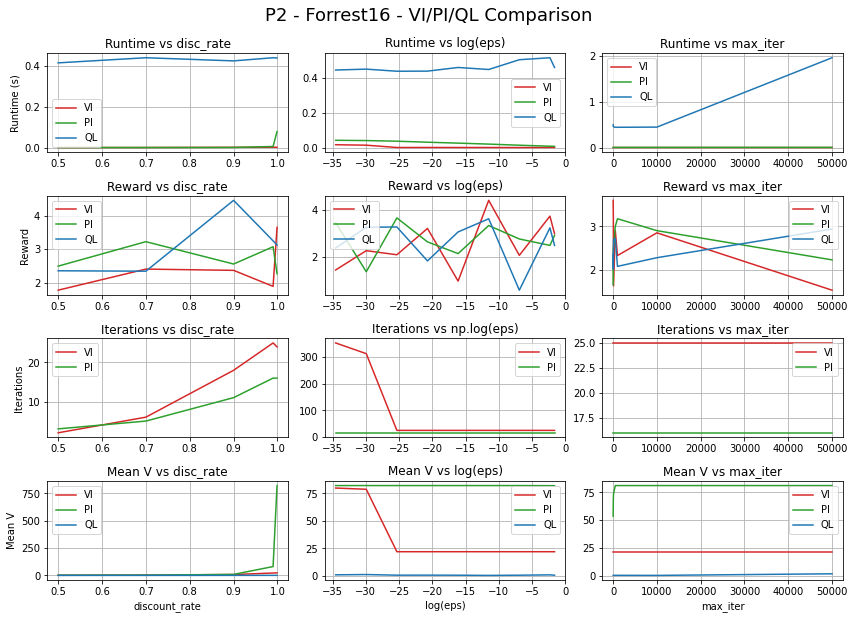

In [97]:
# combined
#plotting curvesQL
disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

fig, axs = plt.subplots(4,3, figsize=(12,9))

axs[0, 0].plot(disc_rate, vi_disc_var[:,0], 'tab:red', label ='VI')
axs[0, 0].plot(disc_rate, pi_disc_var[:,0], 'tab:green', label ='PI')
axs[0, 0].plot(disc_rate, ql_disc_var[:,0], 'tab:blue', label ='QL')
axs[0, 0].set_title('Runtime vs disc_rate')
axs[0, 0].set(ylabel='Runtime (s)')
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 1].plot(np.log(eps), vi_eps_var[:,0], 'tab:red', label ='VI')
axs[0, 1].plot(np.log(eps), pi_eps_var[:,0], 'tab:green', label ='PI')
axs[0, 1].plot(np.log(eps), ql_eps_var[:,0], 'tab:blue', label ='QL')
axs[0, 1].set_title('Runtime vs log(eps)')
axs[0, 1].grid()
axs[0, 2].plot(max_iter, vi_iter_var[:,0], 'tab:red', label ='VI')
axs[0, 2].plot(max_iter, pi_iter_var[:,0], 'tab:green', label ='PI')
axs[0, 2].plot(max_iter, ql_iter_var[:,0], 'tab:blue', label ='QL')
axs[0, 2].set_title('Runtime vs max_iter')
axs[0, 2].grid()

axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()


axs[1, 0].plot(disc_rate, vi_disc_var[:,1], 'tab:red', label ='VI')
axs[1, 0].plot(disc_rate, pi_disc_var[:,1], 'tab:green', label ='PI')
axs[1, 0].plot(disc_rate, ql_disc_var[:,1], 'tab:blue', label ='QL')
axs[1, 0].set_title('Reward vs disc_rate')
axs[1, 0].set(ylabel='Reward')
axs[1, 0].grid()
axs[1, 1].plot(np.log(eps), vi_eps_var[:,1], 'tab:red', label ='VI')
axs[1, 1].plot(np.log(eps), pi_eps_var[:,1], 'tab:green', label ='PI')
axs[1, 1].plot(np.log(eps), ql_eps_var[:,1], 'tab:blue', label ='QL')
axs[1, 1].set_title('Reward vs log(eps)')
axs[1, 1].grid()
axs[1, 2].plot(max_iter, vi_iter_var[:,1], 'tab:red', label ='VI')
axs[1, 2].plot(max_iter, pi_iter_var[:,1], 'tab:green', label ='PI')
axs[1, 2].plot(max_iter, ql_iter_var[:,1], 'tab:blue', label ='QL')
axs[1, 2].set_title('Reward vs max_iter')
axs[1, 2].grid()

axs[1, 0].legend()
axs[1, 1].legend()
axs[1, 2].legend()

axs[2, 0].plot(disc_rate, vi_disc_var[:,2], 'tab:red', label ='VI')
axs[2, 0].plot(disc_rate, pi_disc_var[:,2], 'tab:green', label ='PI')
#axs[2, 0].plot(disc_rate, ql_disc_var[:,2], 'tab:blue', label ='QL')
axs[2, 0].set_title('Iterations vs disc_rate')
axs[2, 0].set(ylabel='Iterations')
axs[2, 0].grid()
axs[2, 1].plot(np.log(eps), vi_eps_var[:,2], 'tab:red', label ='VI')
axs[2, 1].plot(np.log(eps), pi_eps_var[:,2], 'tab:green', label ='PI')
#axs[2, 1].plot(np.log(eps), ql_eps_var[:,2], 'tab:blue', label ='QL')
axs[2, 1].set_title('Iterations vs np.log(eps)')
axs[2, 1].grid()
axs[2, 2].plot(max_iter, vi_iter_var[:,2], 'tab:red', label ='VI')
axs[2, 2].plot(max_iter, pi_iter_var[:,2], 'tab:green', label ='PI')
#axs[2, 2].plot(max_iter, ql_iter_var[:,2], 'tab:blue', label ='QL')
axs[2, 2].set_title('Iterations vs max_iter')
axs[2, 2].grid()

axs[2, 0].legend()
axs[2, 1].legend()
axs[2, 2].legend()

axs[3, 0].plot(disc_rate, vi_disc_var[:,3], 'tab:red', label ='VI')
axs[3, 0].plot(disc_rate, pi_disc_var[:,3], 'tab:green', label ='PI')
axs[3, 0].plot(disc_rate, ql_disc_var[:,3], 'tab:blue', label ='QL')
axs[3, 0].set_title('Mean V vs disc_rate')
axs[3, 0].set(xlabel='discount_rate')
axs[3, 0].set(ylabel='Mean V')
axs[3, 0].grid()
axs[3, 1].plot(np.log(eps), vi_eps_var[:,3], 'tab:red', label ='VI')
axs[3, 1].plot(np.log(eps), pi_eps_var[:,3], 'tab:green', label ='PI')
axs[3, 1].plot(np.log(eps), ql_eps_var[:,3], 'tab:blue', label ='QL')
axs[3, 1].set_title('Mean V vs log(eps)')
axs[3, 1].set(xlabel='log(eps)')
axs[3, 1].grid()
axs[3, 2].plot(max_iter, vi_iter_var[:,3], 'tab:red', label ='VI')
axs[3, 2].plot(max_iter, pi_iter_var[:,3], 'tab:green', label ='PI')
axs[3, 2].plot(max_iter, ql_iter_var[:,3], 'tab:blue', label ='QL')
axs[3, 2].set_title('Mean V vs max_iter')
axs[3, 2].set(xlabel='max_iter')
axs[3, 2].grid()

axs[3, 0].legend()
axs[3, 1].legend()
axs[3, 2].legend()

fig.suptitle('P2 - Forrest16 - VI/PI/QL Comparison', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [98]:
P, R = forest(S=16, r1=4, r2=2, p=0.01)
vi = ValueIteration(P, R, 0.999, epsilon = 0.9,max_iter = 10000)
pi = PolicyIterationModified(P, R, 0.999,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.999, epsilon = 0.9, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 16 Best Policy with p=0.01')
print (vi.policy)
print ('\nPI Forrest 16 Best Policy with p=0.01')
print (pi.policy)
print ('\nQL Forrest 16 Best Policy with p=0.01')
print (ql.policy)


VI Forrest 16 Best Policy with p=0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

PI Forrest 16 Best Policy with p=0.01
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

QL Forrest 16 Best Policy with p=0.01
(0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0)


In [101]:
P, R = forest(S=16, r1=4, r2=2, p=0.2)
vi = ValueIteration(P, R, 0.999, epsilon = 0.9,max_iter = 10000)
pi = PolicyIterationModified(P, R, 0.999,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.999, epsilon = 0.9, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 16 Best Policy with p=0.2')
print (vi.policy)
print ('\nPI Forrest 16 Best Policy with p=0.2')
print (pi.policy)
print ('\nQL Forrest 16 Best Policy with p=0.2')
print (ql.policy)


VI Forrest 16 Best Policy with p=0.2
(0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

PI Forrest 16 Best Policy with p=0.2
(0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

QL Forrest 16 Best Policy with p=0.2
(0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0)


In [104]:
P, R = forest(S=16, r1=4, r2=2, p=0.3)
vi = ValueIteration(P, R, 0.999, epsilon = 0.9,max_iter = 10000)
pi = PolicyIterationModified(P, R, 0.999,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.999, epsilon = 0.9, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 16 Best Policy with p=0.3')
print (vi.policy)
print ('\nPI Forrest 16 Best Policy with p=0.3')
print (pi.policy)
print ('\nQL Forrest 16 Best Policy with p=0.3')
print (ql.policy)


VI Forrest 16 Best Policy with p=0.3
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

PI Forrest 16 Best Policy with p=0.3
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

QL Forrest 16 Best Policy with p=0.3
(0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)


In [112]:
ql = QLearning(P, R, 0.999, epsilon = 0.9, n_iter = 10000)
ql.run()
print (np.mean(ql.V))
ql = QLearning(P, R, 0.999, epsilon = 0.7, n_iter = 10000)
ql.run()
print (np.mean(ql.V))
ql = QLearning(P, R, 0.999, epsilon = 0.001, n_iter = 10000)
ql.run()
print (np.mean(ql.V))

0.5752029091116834
0.5997714282700355
0.4245010154621942


In [113]:
print ((ql.V))

(2.353524764470836, 2.838901948221234, 0.06987869802201493, 0.47229937859858717, 0.0010244862586617429, 0.05613670447741922, 0.001423564231320631, 0.03674276343620171, 0.0032666966640685566, 0.005776638931952626, 0.15573912639706752, 0.0, 0.008110158802429747, 0.001411204549829556, 0.009395012894694446, 0.7783851014387897)
